La ingeniería de características es cuando se agregan o modifican características en los datos.  El ACP es un ejemplo de ingeniería de características, pero existen más formas de agregar, separar, cambiar o combinar las características que pueden conducir a mejores resultados de aprendizaje automático.

Ya conoces otras formas de ingeniería de características, como el escalamiento y la imputación.  Estos transforman tus datos en otra forma y suelen mejorar los resultados del aprendizaje automático.

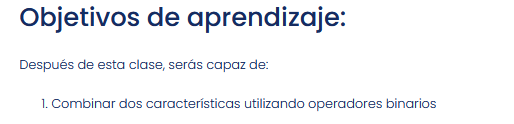

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vReZBM5OC6GLYbacisp_ToNiu3CLWxqPXw7mWBsdRjnYOFLWNufdQ4qd8u5qTzUF2_sBUAMEi5cgy1U/pub?gid=1040198428&single=true&output=csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#**Caracteristicas de la suma:**

Pandas "sobrecarga" numerosos operadores binarios, como +, -, *, /. Cuando se utilizan con una serie de Pandas, estos se aplican a cada elemento en una columna.

En los datos de Titanic "SibSp" es el numero de hermanos y conyuge que un pasajero tiene a bordo con ellos, y "Parch" es el numero de padres e hijos que estan con ellos. Digamos que queremos agregar una nueva columna que representa el numero total de los miembros de la familia que una persona tiene a bordo. Podemos definir la columna al agregar las otras dos columnas juntas.

In [4]:
df['TotalFamily'] = df['SibSp'] + df['Parch'] 
df = df.drop(['SibSp', 'Parch'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


##**Caracteristicas de concatenacion**

Digamos que queremos hacer algo mas complejo, como tener una columna con la informacion sobre el sexo del pasajero y la edad aproximada por decada.

En primer lugar, redondeariamos la columna "Age" a la decada mas cercana. El argumento de Series.round(#) es el numero de decimales al que se redondea el numero. Queremos redondearlo a 10, por lo que utilizaremos un numero negativo.

In [5]:
df['Age'] = df['Age'].round(-1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,20.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,40.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,30.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,40.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,40.0,373450,8.0500,NaN,S,0


Pandas sobrecargará el signo “+” para concatenar dos columnas de cadenas, así como también sumar dos columnas numéricas.  Sin embargo, lanzará un error si intentamos utilizarlo con una cadena y una característica numérica.  Necesitaremos cambiar el tipo de datos de “Age” a una cadena antes de concatenar utiliando “+”.

In [6]:
df['GenderAge'] = df['Sex'] + df['Age'].astype('string')
df.drop(columns=['Sex','Age'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,Cabin,Embarked,TotalFamily,GenderAge
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,NaN,S,1,male20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,C,1,female40.0
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,NaN,S,0,female30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,S,1,female40.0
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,NaN,S,0,male40.0


##**Características de la cuadratura y multiplicación**

Hagamos una cosa más.  Digamos que queremos normalizar los precios que los pasajeros pagaron.  Decidimos que la manera para hacer esto es multiplicando los precios al cuadrado del Pclass.

In [7]:
df['NormedFare'] = df['Fare'] * df['Pclass']**2
df.drop(columns='Fare', inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Ticket,Cabin,Embarked,TotalFamily,GenderAge,NormedFare
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,NaN,S,1,male20.0,65.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C,1,female40.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S,0,female30.0,71.3250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S,1,female40.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",373450,NaN,S,0,male40.0,72.4500


##Resumen:

Pandas “sobrecarga” o cambiar el comportamiento de numerosos operadores en Python, como “+”, “-”, “/” y “*” para aplicarlos de forma elemental a pares de características.  Esto se puede utilizar para combinar dos características en una.